In [1]:
import numpy as np
import torch
import torch.nn as nn
import random
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.datasets.folder import default_loader
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision import models, transforms
from torch.autograd import Variable

In [2]:
batch_size = 128

train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/datasets/wavelet_chest_xray/train"
val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/datasets/wavelet_chest_xray/val"
test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/datasets/wavelet_chest_xray/test"

transform = transforms.Compose(
                [
                    
                    transforms.Resize((224, 224)),
                    transforms.ToTensor(),
                ]
            )

train_data = ImageFolder(train_dir, transform=transform, loader=default_loader)
val_data = ImageFolder(val_dir, transform=transform, loader=default_loader)
test_data = ImageFolder(test_dir, transform=transform, loader=default_loader)

In [3]:
def START_seed():
    seed = 9
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [4]:
# load dataset
START_seed()
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, num_workers = 8)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size, shuffle=True, num_workers = 8)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False, num_workers = 8)

images.shape: torch.Size([128, 3, 224, 224])


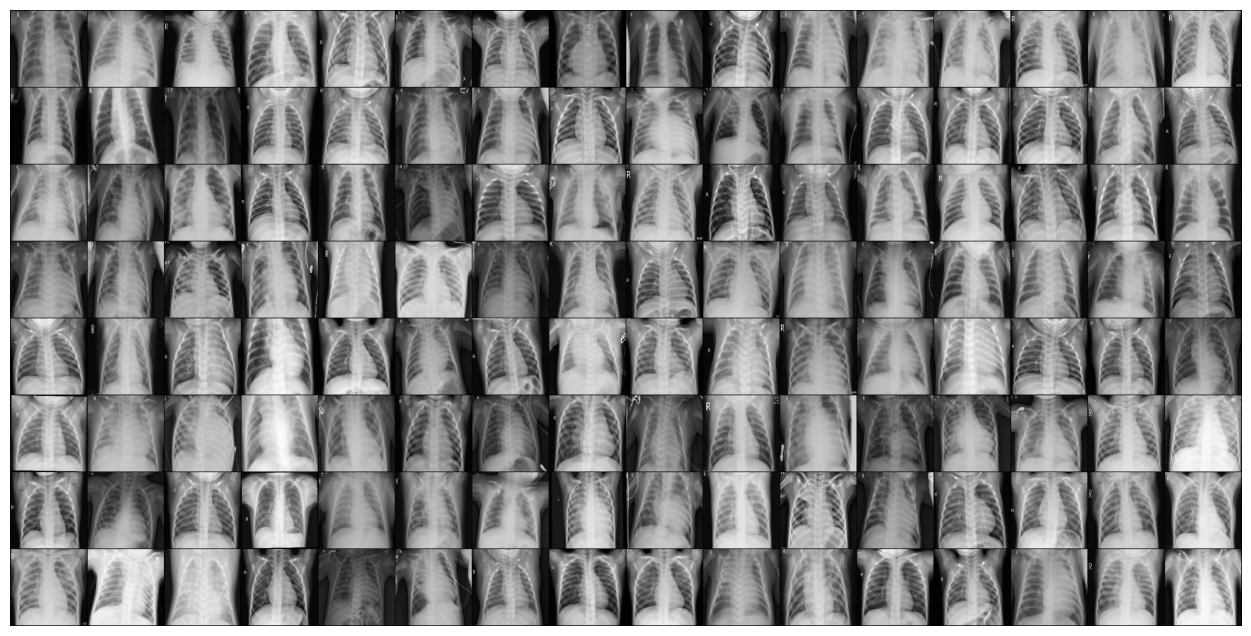

In [5]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [6]:
# Extract features (X) and labels (y) for training, validation, and test sets
X_train, y_train = zip(*[(data, target) for data, target in train_data])
X_val, y_val = zip(*[(data, target) for data, target in val_data])
X_test, y_test = zip(*[(data, target) for data, target in test_data])

In [7]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [8]:
# Load the pre-trained ResNet18 model
resnet = models.resnet18(pretrained=True)
n_inputs = resnet.fc.in_features
resnet.fc = nn.Linear(n_inputs, 100)
resnet.eval()

# Function to extract features from an image
def extract_features(image_tensor):
    with torch.no_grad():
        image_variable = Variable(image_tensor.unsqueeze(0))
        features = resnet(image_variable)
    return features.flatten().numpy()

/home/dawlat.akaila/.conda/envs/ai701/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dawlat.akaila/.conda/envs/ai701/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
# Apply the feature extraction to each image in X_train
X_train_features = []

for i in range(len(X_train)):
    img_tensor = X_train[i]
    features = extract_features(img_tensor)
    X_train_features.append(features)

# Convert the list of features to a NumPy array
X_train_features = np.array(X_train_features)

In [10]:
# Apply the feature extraction to each image in X_train
X_val_features = []

for i in range(len(X_val)):
    img_tensor = X_train[i]
    features = extract_features(img_tensor)
    X_val_features.append(features)

# Convert the list of features to a NumPy array
X_val_features = np.array(X_val_features)

In [11]:
# Apply the feature extraction to each image in X_train
X_test_features = []

for i in range(len(X_test)):
    img_tensor = X_train[i]
    features = extract_features(img_tensor)
    X_test_features.append(features)

# Convert the list of features to a NumPy array
X_test_features = np.array(X_test_features)

In [12]:

np.save('/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet_100/X_train_features.npy', X_train_features)
np.save('/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet_100/X_val_features.npy', X_val_features)
np.save('/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet_100/X_test_features.npy', X_test_features)

np.save('/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet_100/y_train.npy', y_train)
np.save('/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet_100/y_val.npy', y_val)
np.save('/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet_100/y_test.npy', y_test)